# E13 - Student's t-distribution: PDF/CDF Plots, Tail Areas, and Normal Convergence

## 1. Theoretical Foundation

Before diving into the code, let's build a solid theoretical understanding of Student's t-distribution. This distribution is a cornerstone of inferential statistics, particularly when dealing with small sample sizes or when the population standard deviation is unknown.

### What is the t-distribution?

The **Student's t-distribution** is a family of probability distributions that arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. It was developed by William Sealy Gosset, who published under the pseudonym "Student," hence the name.

The shape of the t-distribution is similar to the standard normal distribution (bell-shaped and symmetric around zero), but it has heavier tails. This means it is more prone to producing values that fall far from its mean. This "heaviness" is controlled by a parameter called **degrees of freedom** ($\nu$).

### Key Concepts:

* **Degrees of Freedom ($\nu$)**: This parameter defines the specific t-distribution. For a sample of size $n$, the degrees of freedom are typically $\nu = n - 1$. The fewer the degrees of freedom, the heavier the tails of the distribution. As $\nu$ approaches infinity, the t-distribution converges to the standard normal distribution. This convergence is a key aspect of this exercise.

* **Probability Density Function (PDF)**: The PDF of the t-distribution describes the likelihood of observing a particular value. Its formula is more complex than the normal distribution's, but its shape is what we focus on: a symmetric bell curve. In part (a) of the exercise, we will visualize how the shape of the PDF changes for different degrees of freedom and how it compares to the standard normal PDF.

* **Cumulative Distribution Function (CDF)**: The CDF, $F(t)$, gives the probability that a variable from a t-distribution will take a value less than or equal to $t$. It's the integral of the PDF. We will use it in part (c) to find **critical values**, which are crucial for constructing confidence intervals and performing hypothesis tests. For example, $t_{0.975,\nu}$ is the value below which 97.5% of the distribution's area lies.

### Why is it important in Dependability?

In reliability and performance evaluation, we often collect sample data (e.g., response times, failure rates) to make inferences about the entire system. Often, we can't run thousands of tests, so our sample sizes are small. Furthermore, we rarely know the true standard deviation of the process we are measuring. In these common scenarios, the t-distribution is the correct tool to use for calculating confidence intervals or comparing system performances (as seen in E6 and E9), providing more accurate and honest assessments than the z-distribution would.

This exercise will visually and numerically demonstrate these properties. We'll see the "family" of t-curves and watch them "morph" into the familiar standard normal curve as the degrees of freedom increase.

---

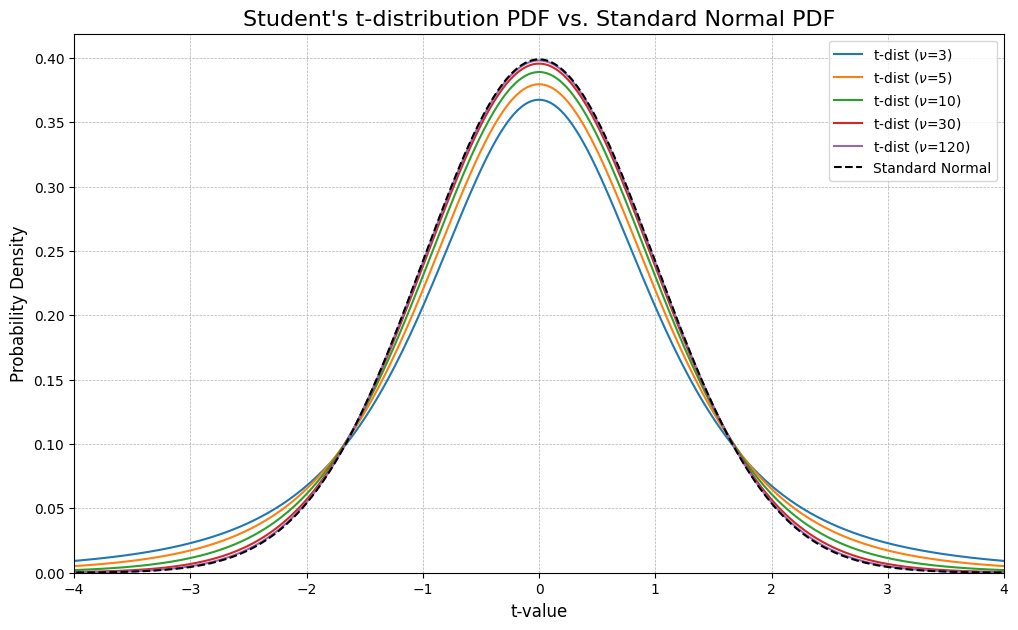

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# --- Setup ---
# Degrees of freedom to be evaluated as per the exercise
dof = [3, 5, 10, 30, 120]
# X-axis values for plotting
x = np.linspace(-5, 5, 500)
# Colors for the plots to distinguish the lines
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# --- Part (a): Plotting the Probability Density Function (PDF) ---
plt.figure(figsize=(12, 7))

# Plot the t-distribution PDF for each degree of freedom
for i, df in enumerate(dof):
    plt.plot(x, t.pdf(x, df), label=f't-dist ($\\nu$={df})', color=colors[i])

# Overlay the standard Normal PDF for comparison
plt.plot(x, norm.pdf(x), label='Standard Normal', color='black', linestyle='--')

# --- Formatting the plot ---
plt.title("Student's t-distribution PDF vs. Standard Normal PDF", fontsize=16)
plt.xlabel("t-value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.xlim(-4, 4)

plt.show()

### Analysis of the PDF Plot

The plot above clearly illustrates the core concepts of the t-distribution. Notice how the distributions with fewer degrees of freedom (e.g., $\nu=3$, $\nu=5$) are shorter and wider than the standard normal distribution. This visual representation shows the "heavier tails," indicating a higher probability of extreme values.

As the degrees of freedom ($\nu$) increase, the t-distribution curves get taller and narrower, progressively approaching the dashed line of the standard normal distribution. The curve for $\nu=120$ is almost indistinguishable from the normal curve, demonstrating the convergence property.

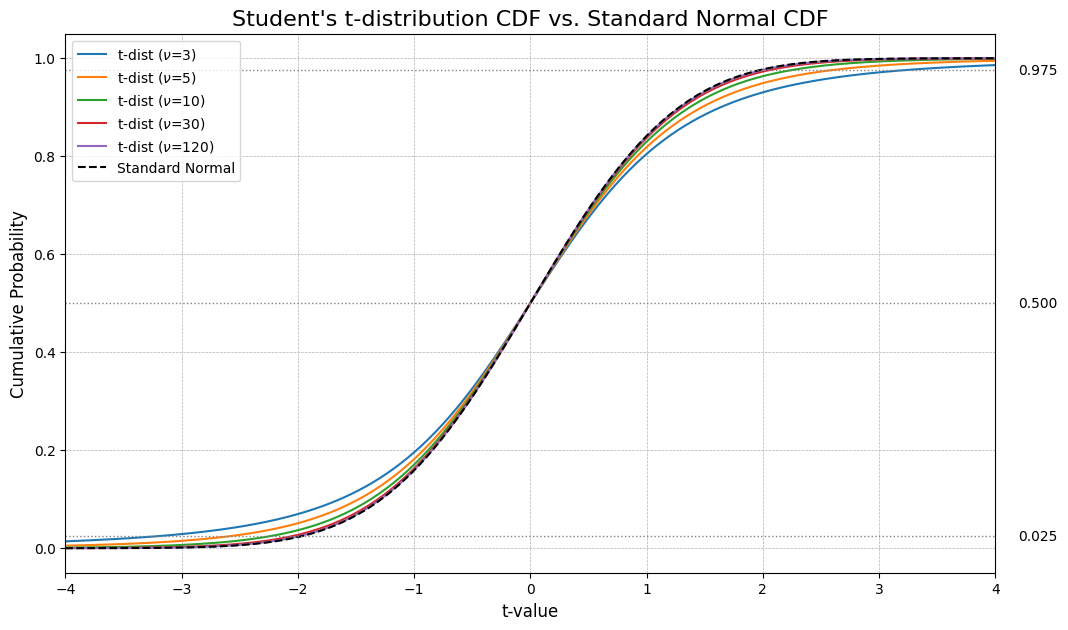

In [2]:
# --- Part (b): Plotting the Cumulative Distribution Function (CDF) ---
plt.figure(figsize=(12, 7))

# Plot the t-distribution CDF for each degree of freedom
for i, df in enumerate(dof):
    plt.plot(x, t.cdf(x, df), label=f't-dist ($\\nu$={df})', color=colors[i])

# Overlay the standard Normal CDF for comparison
plt.plot(x, norm.cdf(x), label='Standard Normal', color='black', linestyle='--')

# Add horizontal lines at key probability levels
plt.axhline(y=0.025, color='gray', linestyle=':', linewidth=1)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1)
plt.axhline(y=0.975, color='gray', linestyle=':', linewidth=1)
plt.text(4.2, 0.025, '0.025', verticalalignment='center')
plt.text(4.2, 0.5, '0.500', verticalalignment='center')
plt.text(4.2, 0.975, '0.975', verticalalignment='center')


# --- Formatting the plot ---
plt.title("Student's t-distribution CDF vs. Standard Normal CDF", fontsize=16)
plt.xlabel("t-value", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-4, 4)

plt.show()

### Analysis of the CDF Plot

The CDF plot complements the insights from the PDF plot. It shows the cumulative probability. The horizontal lines at 0.025, 0.5, and 0.975 are important markers for hypothesis testing and confidence intervals (especially for a 95% confidence level, which uses the 2.5% and 97.5% points).

Again, we observe the convergence. The CDF curves for higher degrees of freedom lie almost perfectly on top of the standard normal CDF curve. For lower $\nu$, the curves are less steep, which again reflects the greater spread (higher variance) of the distribution.

In [3]:
# --- Part (c): Calculating Critical Values ---

# The target probability for the critical value t_{0.975, nu}
# This is the point where the CDF equals 0.975
p = 0.975

# Calculate the critical value for each degree of freedom
critical_values_t = {df: t.ppf(p, df) for df in dof}

# Calculate the critical value for the standard normal distribution (z_0.975)
critical_value_z = norm.ppf(p)

# --- Displaying the results in a structured way ---
print("--- Critical Values from Inverse CDF (Percent Point Function) ---")
print(f"Solving for t where F(t) = {p}\n")

for df, val in critical_values_t.items():
    print(f"t_{p}, (df={df:<3}): {val:.4f}")

print("-" * 40)
print(f"z_{p} (Normal): {critical_value_z:.4f}")

--- Critical Values from Inverse CDF (Percent Point Function) ---
Solving for t where F(t) = 0.975

t_0.975, (df=3  ): 3.1824
t_0.975, (df=5  ): 2.5706
t_0.975, (df=10 ): 2.2281
t_0.975, (df=30 ): 2.0423
t_0.975, (df=120): 1.9799
----------------------------------------
z_0.975 (Normal): 1.9600


### Analysis of the Critical Values

The critical value $t_{0.975, \nu}$ is the point on the x-axis of a t-distribution with $\nu$ degrees of freedom such that 97.5% of the area under the curve is to its left. These values are fundamental for a two-tailed hypothesis test with a significance level of $\alpha = 0.05$ or for constructing a 95% confidence interval.

The output confirms our visual observations from the plots:
* For a low number of degrees of freedom (e.g., $\nu=3$), the critical value (3.1824) is significantly larger than the standard normal's critical value of 1.96. This means that to be 95% confident, we need a much wider interval to account for the increased uncertainty associated with a small sample.
* As $\nu$ increases, the critical value for the t-distribution gets progressively closer to $z_{0.975} \approx 1.96$. At $\nu=120$, the value (1.9799) is very close to the normal approximation.

This exercise provides a clear, practical demonstration of why we must use the t-distribution for small samples and how it gracefully converges to the normal distribution as our sample size grows, unifying these two fundamental statistical tools.
---